<a href="https://colab.research.google.com/github/JoeyAviles89z/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/JoeyAviles_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
#create the sales list:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
import math
import numpy as np
import pandas as pd

In [0]:
#find the mean
total = sum(sales)
mean_sales = total/len(sales)
print('mean sales: ', mean_sales)

mean sales:  3052.714285714286


In [0]:
#Variance is the measure of a spread
#create a function for variance
def subtract_mean(number):
  return number - mean_sales

#you can convert this to lambda for efficiency:
lambda x: x - mean_sales

<function __main__.<lambda>>

In [0]:
#you can use 'map' to apply that function to our list
distances = list(map(subtract_mean, sales))

In [0]:
#square and sum all of those distances
squared_distances = list(map(lambda x: x**2, distances))

In [0]:
#how long is our list?
list_length = len(squared_distances) -1 #This is a sample taken from a population
list_length = len(squared_distances) #this is for a entire population (not a sample)

In [0]:
#find the variance
variance_sales = sum(squared_distances)/list_length
print('{:.2f}'.format(variance_sales, 3))

183761.06


In [0]:
#standard dev
#find the standard deviation
print('{:.2f}'.format(math.sqrt(variance_sales)))
print('{:.2f}'.format(np.sqrt(variance_sales)))

428.67
428.67


In [0]:
# check it with numpy
print(np.mean(sales))
print('{:.2f}'.format(np.var(sales)))
print('{:.2f}'.format(np.std(sales)))

3052.714285714286
183761.06
428.67


In [0]:

# check it with pandas
df = pd.DataFrame({"sales": sales})
print('mean:', df['sales'].mean())

mean: 3052.714285714286


In [0]:
# find population
print('var:', '{:.2f}'.format(df['sales'].var(ddof=0)))
print('std:', '{:.2f}'.format(df['sales'].std(ddof=0)))

var: 183761.06
std: 428.67


In [0]:
# find sample
print('var:', '{:.2f}'.format(df['sales'].var(ddof=1)))
print('std:', '{:.2f}'.format(df['sales'].std(ddof=1)))

var: 214387.90
std: 463.02


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
#Create a list of cutomers that entered the store last week
customers = [127, 80, 105, 92, 120, 115, 93]

In [0]:
#Use numpy
#The dimensions have to be the same
print('{:.2f}'.format(np.cov(sales, customers)[0][1]))

7604.36


In [0]:
#Use pandas
df['customers'] = pd.Series(customers)
print('{:.2f}'.format(df.cov().values[0][1]))

7604.36


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
#find the standard deviation of both lists with pandas
std_sales = df['sales'].std(ddof=1)
std_customers = df['customers'].std(ddof=1)
print('{:.4f}'.format(std_sales))
print('{:.4f}'.format(std_customers))

463.0204
17.0573


In [0]:
#Find the covariance with Pandas
cov_salescust = df['sales'].cov(df['customers'])
print('{:.4f}'.format(cov_salescust))

7604.3571


In [0]:
#Find the denominator
denominator = std_sales*std_customers

In [0]:
#Find the correlation
corr_salescust = cov_salescust/denominator
print('{:.6f}'.format(corr_salescust))

0.962834


In [0]:
#Check it with pandas
print('{:.6f}'.format(df['sales'].corr(df['customers'])))

0.962834


In [0]:
#Do it with a shortcut
df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.head(3)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
#find the covariance for the whole dataset
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [0]:
#find the correlation for the whole dataset
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
#import
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#If the dot product is equal to 0, then the vectors are orthogonal.
#If the dot product is not equal, then the vectors are not orthogonal.
a = np.array([0, 16])
b = np.array([-17, 0])
np.dot(a, b)

0

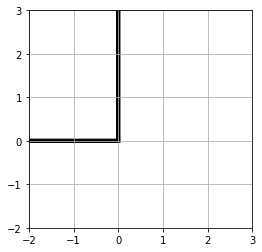

In [0]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,3)          
plt.ylim(-2,3)

# Plot the vectors
for vect in [a, b]:
    plt.arrow(0,0, vect[0], vect[1], head_width=.2, head_length=0.2, linewidth=4)
plt.show()

The synonym for orthogonal is perpendicular. Its  vectors or matrices existing at right angles to one another.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])
np.dot(a, b)

-40

The following vectors are not orthogonal because the dot product is not equal to zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [13]:
# Find ||c||^2 (i.e., find the length of g squared)
import numpy as np

c = np.array([2, -15, 6, 20])
norm_c = ((np.linalg.norm(c)) **2)
print(c, "\n Norm of c:", norm_c)

[  2 -15   6  20] 
 Norm of c: 665.0


In [0]:
# Find C*C Using Dot-Product Method
print("Dot Product:", np.dot(c,c))

Dot Product: 665


In [8]:
# Use Matric Multiplication instead of dot product to multiply the transpose of c with c.
print("Matric Multiplication:", np.matmul(c.T, c))

Matric Multiplication: 665


In [0]:
c = np.array([2, -15, 6, 20])
pd.DataFrame(c)

,0
0,2
1,-15
2,6
3,20


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

# Unit Vectors

## Vectors as linear combinations of scalars and unit vectors

 You can turn any non-zero vector into a unit vector by dividing it by its norm (length/magnitude).

Any vector (or matrix) can be be described in terms of a linear combination of scaled unit vectors. Lets look at an example.

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix}
\end{align}

We think about a vector that starts at the origin and extends to point $(7,12)$ and
We think about a vector that starts at the origin and extends to point $(2,11,-8)$

Lets rewrite this in terms of a linear combination of scaled unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

This says that matrix $\begin{bmatrix} 7 \\ 12 \end{bmatrix}$ will result from scaling the $\hat{i}$ unit vector by 7, the $\hat{j}$ vector by 12 and then adding the two together.

We can describe any vector in $\mathbb{R}^2$ in this way. Well, we can describe any vector in any dimensionality this way provided we use all of the unit vectors for that space and scale them all appropriately. In this examply we just happen to be using a vector whose dimension is 2.

For E:

Lets rewrite this in terms of a linear combination of scaled unit vectors:

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + -8\hat{k}
\end{align}

This says that matrix $\begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix}$ will result from scaling the $\hat{i}$ unit vector by 2, the $\hat{j}$ vector by 11, the $\hat{j}$ vector by -8, and then adding the three together.

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4, 12, 11, 9, 2])
f

array([ 4, 12, 11,  9,  2])

In [0]:
#To turn it to a unit vector, you must find the norm(how long it is) first.
norm_f = np.linalg.norm(f)
print('{:.4f}'.format(norm_f))

19.1311


In [0]:
#Bow find the unit vector
f_unitv = f/np.linalg.norm(f)
print(f_unitv)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


In [0]:
#How long is it
f_unitv_norm = np.linalg.norm(f_unitv)
print('{:.4f}'.format(f_unitv_norm))

1.0000


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
# Linearly dependent vectors
vector_a = [2.3, -3.7]
vector_b = np.multiply(vector_a, 4)
print(vector_a, '\n', vector_b)

[2.3, -3.7] 
 [  9.2 -14.8]


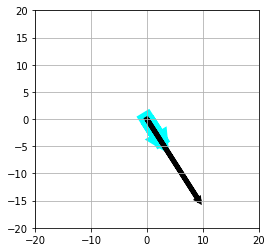

In [0]:
# Plot the vectors

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-20,20)          
plt.ylim(-20,20)

for myvect, mycolor, width in [(vector_a, 'aqua', 15), (vector_b, 'k', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

In [0]:
# Linearly independent vectors, not orthogonal
vector_a = np.random.randint(low=-3, high=3, size=3)
vector_b = np.random.randint(low=-3, high=3, size=3)
print(vector_a, '\n', vector_b)

[ 1 -1 -3] 
 [2 1 1]


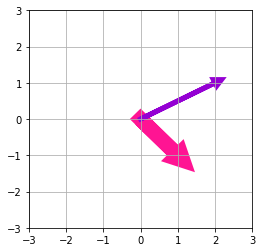

In [0]:
# Set up the grid
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,3)          
plt.ylim(-3,3)

# Plot the vectors
for myvect, mycolor, width in [(vector_a, 'deeppink', 15), (vector_b, 'darkviolet', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

The span is the set of all possible vectors that can be created with a linear combination of two vectors.

In [0]:
g = np.array([1, 2])
h = np.array([4, 8])

In [11]:
#I used a rank because by graphing the vectors, you still cannot find the clear span of two or more vectors.
gh = np.array([[1,2],[4,8]])
np.linalg.matrix_rank(gh)

1

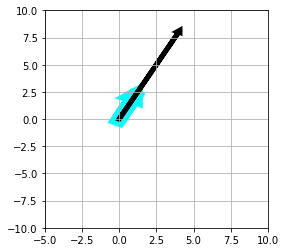

In [0]:

# Plot the vectors

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,10)          
plt.ylim(-10,10)

for myvect, mycolor, width in [(g, 'aqua', 15), (h, 'k', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

The span is a one dimensional space. All real numbers are on a one dimensional space.

In [0]:

# This is one possible linear combination:
a,b=(4,6)
linear_combo= np.multiply(g, a) + np.multiply(h, b) 
print(linear_combo) #Now we have 3 vectors

[28 56]


In [0]:

# This is a set of several linear combinations:
muchos_combos=[]
for (a,b) in [(2,3), (4,5), (6,7), (8,9)]:
    linear_combo = np.multiply(g, a) + np.multiply(h, b) 
    muchos_combos.append(linear_combo)
print(muchos_combos) #New vectors produced by linear combinations

[array([14, 28]), array([24, 48]), array([34, 68]), array([44, 88])]


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
l = np.array([1, 2, 3])
m = np.array([-1, 0, 7])
n = np.array([4, 8, 2])

In [12]:
P = np.array([[1,2,3],[-1,0,7],[4,8,2]])
np.linalg.matrix_rank(P)

3

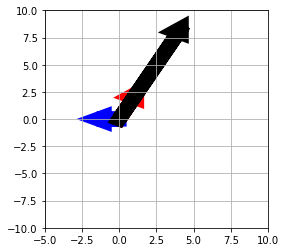

In [0]:
# Plot the vectors

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,10)          
plt.ylim(-10,10)

for myvect, mycolor, width in [(l, 'red', 15), (m, 'blue', 15), (n, 'k', 15)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.4, 
              head_length=0.4, 
              linewidth=width, 
              color=mycolor)

The span of LMN is 3.

In [0]:
# This is one possible linear combination:
a,b,c=(4,6,8)
linear_combo= np.multiply(l, a) + np.multiply(m, b) + np.multiply(n, b) 
print(linear_combo) #Now we have another vector

[22 56 66]


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



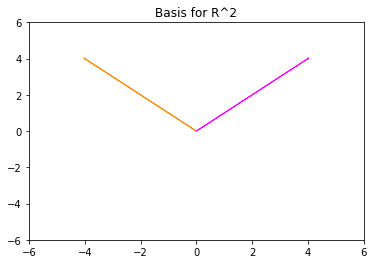

In [0]:

# find basis vectors in 2-d
vector_1 = [-4, 4]
vector_2 = [4, 4]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='darkorange')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='fuchsia')
plt.xlim(-6,6)          
plt.ylim(-6,6)
plt.title("Basis for R^2")
plt.show()

## 6.2 What does it mean to form a basis?

Basis vectors are unit vectors used to define dimensionality. In 2 dimensions there are 2 basis vectors and in 3 there are 3 basis vectors. Basis vectors are always at length 1. The basis of a vector are linearly independent and fills up the space of the vector.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
P = np.array([[1,2,3],[-1,0,7],[4,8,2]])
np.linalg.matrix_rank(P)

3

In [0]:

# Return a 3-D array with ones on the diagonal and zeros elsewhere.
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us the number of dimensions in the output of a matrix that's used for linear transformation. The rank is the number of non-redundant vectors; the number of unique vectors in a matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
# Original Vector
v = np.array([1,3])
w = np.array([-1,2])

In [0]:
# dot product
w_dot_v = np.dot(v, w)
v_dot_v = np.dot(v, v)

In [0]:
# projection
fraction = w_dot_v/v_dot_v
projection = np.multiply(fraction,v)
print(projection)

[0.5 1.5]


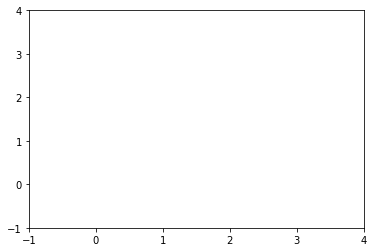

In [0]:
# Plot a line
plt.xlim(-1,4)          
plt.ylim(-1,4)
axes = plt.gca()

In [0]:
# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


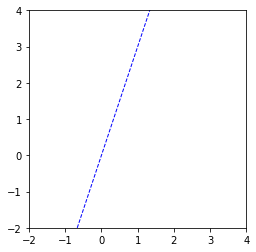

In [0]:
# Axis Bounds
plt.xlim(-2,4)          
plt.ylim(-2,4)

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

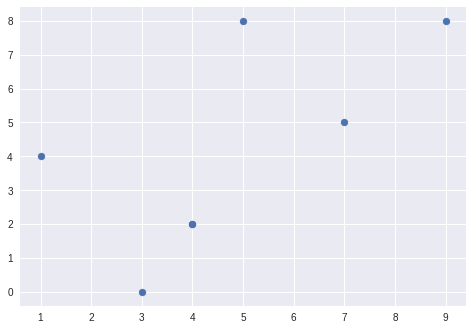

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()